In [3]:
from PIL import Image
import csv

In [4]:
# Converting array to gray-scale image
def array_to_image(img_arr, img_size=(28,28)):
    img = Image.new('L', img_size, 'black')
    pixels = img.load()
    for row in range(img_size[0]):
        for col in range(img_size[1]):
            # Pos in array is dependent on column size (img_size[1])
            color = img_arr[(row + col*28)]
            pixels[row,col] = int(color)
    return img

In [5]:
# Import CSV
train_data = 'sign_mnist_train.csv'

# Save converted images to a list of images
images = []
with open(train_data, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for new_img in reader:
        #First is label
        label = new_img[0]
        img_arr = new_img[1:]
        images.append((label, array_to_image(img_arr)))        

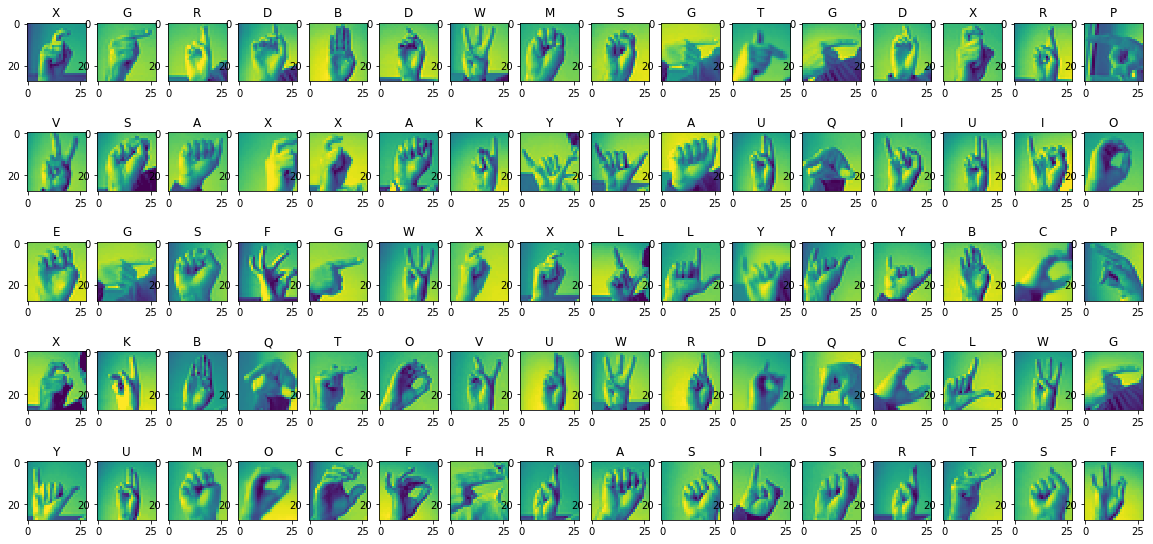

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
# Display image previews below
plt.figure(figsize=(20,40))
columns = 16
n = 1
# Randomly choose images to display (with label)
for l,im in random.sample(images,80):
    plt.subplot(20, columns, n)
    n+=1
    plt.imshow(im)
    l = int(l)+65
    letter = chr(l)
    plt.title(letter)